In [18]:
import gym
import numpy as np
from gym.envs.registration import register
import matplotlib.pyplot as plt

register(
    id='FrozenLakev3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name': '4x4',
        'is_slippery': False
    }
)
env = gym.make("FrozenLake-v1")

/opt/conda/lib/python3.8/site-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment FrozenLakev3
  logger.warn(f"Overriding environment {id}")


In [19]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
learning_rate = .85
dis = .99
num_episodes = 2000
rList = []

In [20]:
for i in range(num_episodes):
    state = env.reset() #환경 초기화
    rAll = 0
    done = False
    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n)/(i+1)) #

        new_state, reward, done, _ = env.step(action)

        Q[state,action] = (1-learning_rate) * Q[state,action] + learning_rate*( reward + dis * np.max(Q[new_state,:]))

        rAll += reward
        state = new_state
    rList.append(rAll)

Success rate: 0.5545
Final Q-Table Values
LEFT DOWN RIGHT UP
[[6.86232974e-01 1.39057437e-02 6.15222739e-03 6.04300998e-03]
 [1.21505014e-05 4.30589811e-04 8.19324212e-04 4.08731532e-03]
 [3.33854045e-03 3.01565265e-03 1.28816832e-02 0.00000000e+00]
 [3.88196347e-03 2.76569582e-03 0.00000000e+00 1.80681383e-02]
 [7.31850328e-01 3.84193385e-06 3.45125440e-03 4.09059658e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.62516047e-04 3.99784860e-04 4.96460023e-05 7.86899580e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.17151785e-03 3.80204293e-01]
 [2.60816439e-04 7.08695181e-01 3.57276996e-04 0.00000000e+00]
 [1.20016557e-01 1.74854446e-05 4.78141650e-04 4.79682681e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.59568912e-02 4.85291752e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.85417179e-01 0.00000000

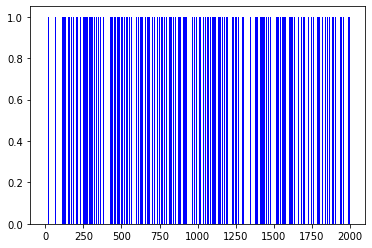

In [21]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()